In [1]:
import pandas as pd
from pandas import  DataFrame
import sklearn
from sklearn.model_selection import train_test_split
import time
import numpy as np
import xgboost as xgb
import sys
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.
C:\Users\jackadv\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jackadv\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jackadv\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jackadv\App

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ID = test.values[:, 0]
train.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [3]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null object
etymd        1521787 non-null int64
flbmk        1509206 non-null object
flg_3dsmk    1509206 non-null object
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null object
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null object
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(16), object(5)
memory us

In [4]:
all_column_values = DataFrame(pd.concat([DataFrame(train.columns.values)]))[0].unique()
all_column_values

array(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg',
       'etymd', 'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'insfg',
       'iterm', 'locdt', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity',
       'stocn', 'stscd', 'txkey'], dtype=object)

In [5]:
pd.value_counts(train['fraud_ind'])

0    1501432
1      20355
Name: fraud_ind, dtype: int64

Text(0, 0.5, 'Frequency')

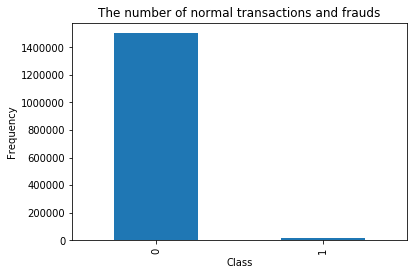

In [6]:
pd.value_counts(train['fraud_ind'], sort=True).plot(kind='bar')
plt.title('The number of normal transactions and frauds')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [7]:
def Convertnumber(Data, field):
    Data[field]= Data[field].astype('category')
    catdict = dict(enumerate(Data[field].cat.categories))
    Data[field] = Data[field].cat.codes
    return catdict, Data

In [8]:
tdict = pd.read_csv('train.csv')
for i in tdict.columns:

    if  (type(tdict.ix[0,i] )) == str:
               appdict, tdict = Convertnumber(tdict, i)
    elif (type(tdict.ix[0,i] )) == np.bool_ :
              appdict, tdict = Convertnumber(tdict, i)
    else:
            print("!!! can not ")



C:\Users\jackadv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\jackadv\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 


In [9]:
tdict.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,0,0,0,0,...,0,33,172652.0,457,59333,0,0,102,0,516056
1,0,134508,45725,465.62,5,0,0,2,0,0,...,0,9,105114.0,451,0,0,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,0,0,0,0,...,0,6,152458.0,457,59333,0,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,0,5,0,0,...,0,5,172946.0,247,50436,0,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,0,4,0,0,...,0,6,182129.0,263,93775,0,5817,102,0,1051004


In [10]:
tdict.info()
train = tdict
print('-'*40)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null int8
etymd        1521787 non-null int64
flbmk        1521787 non-null int8
flg_3dsmk    1521787 non-null int8
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null int8
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null int8
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(16), int8(5)
memory usage: 216.2 M

In [11]:
tdict = pd.read_csv('test.csv')
for i in tdict.columns:

    if  (type(tdict.ix[0,i] )) == str:
               appdict, tdict = Convertnumber(tdict, i)
    elif (type(tdict.ix[0,i] )) == np.bool_ :
              appdict, tdict = Convertnumber(tdict, i)
    else:
            print("!!! can not ")


!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 
!!! can not 


C:\Users\jackadv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\jackadv\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [12]:
tdict.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,102,215328.0,457,59360,0,0,102,0,592489
1,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,102,222007.0,457,59360,0,0,102,0,592452
2,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,100,170013.0,457,59360,0,0,102,0,590212
3,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,100,165914.0,457,59360,0,0,102,0,590209
4,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,102,215311.0,457,59360,0,0,102,0,592488


In [13]:
tdict.info()
test = tdict
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421665 entries, 0 to 421664
Data columns (total 22 columns):
acqic        421665 non-null int64
bacno        421665 non-null int64
cano         421665 non-null int64
conam        421665 non-null float64
contp        421665 non-null int64
csmcu        421665 non-null int64
ecfg         421665 non-null int8
etymd        421665 non-null int64
flbmk        421665 non-null int8
flg_3dsmk    421665 non-null int8
hcefg        421665 non-null int64
insfg        421665 non-null int8
iterm        421665 non-null int64
locdt        421665 non-null int64
loctm        421665 non-null float64
mcc          421665 non-null int64
mchno        421665 non-null int64
ovrlt        421665 non-null int8
scity        421665 non-null int64
stocn        421665 non-null int64
stscd        421665 non-null int64
txkey        421665 non-null int64
dtypes: float64(2), int64(15), int8(5)
memory usage: 56.7 MB
----------------------------------------
<class 'pandas.cor

In [14]:
X = train.drop('fraud_ind', axis=1)
y = train['fraud_ind']

In [15]:
sm = SMOTE(random_state=42)    # 处理过采样的方法
X, y = sm.fit_sample(X, y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,n_pos_sample/n_sample,n_neg_sample/n_sample))


通过SMOTE方法平衡正负样本后
样本个数：3002864; 正样本占50.00%; 负样本占50.00%


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [17]:
# Train model
clf = xgb.XGBClassifier(n_estimators=2000, objective='binary:logistic', eval_metric='auc', eta=0.1, max_depth=8, subsample=1, colsample_bytree=1, silent=1)
clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.984275
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.98535
[2]	validation_0-auc:0.985623
[3]	validation_0-auc:0.985891
[4]	validation_0-auc:0.986788
[5]	validation_0-auc:0.987453
[6]	validation_0-auc:0.987613
[7]	validation_0-auc:0.987872
[8]	validation_0-auc:0.988158
[9]	validation_0-auc:0.988561
[10]	validation_0-auc:0.988773
[11]	validation_0-auc:0.988921
[12]	validation_0-auc:0.989453
[13]	validation_0-auc:0.989732
[14]	validation_0-auc:0.989989
[15]	validation_0-auc:0.990327
[16]	validation_0-auc:0.99083
[17]	validation_0-auc:0.991137
[18]	validation_0-auc:0.991332
[19]	validation_0-auc:0.991516
[20]	validation_0-auc:0.991633
[21]	validation_0-auc:0.991861
[22]	validation_0-auc:0.99199
[23]	validation_0-auc:0.99213
[24]	validation_0-auc:0.99229
[25]	validation_0-auc:0.992445
[26]	validation_0-auc:0.992551
[27]	validation_0-auc:0.992718
[28]	validation_0-auc:0.992816
[29]	validation_0-auc:0.992934
[30]	validation_0-auc

[259]	validation_0-auc:0.998799
[260]	validation_0-auc:0.998799
[261]	validation_0-auc:0.998799
[262]	validation_0-auc:0.998799
[263]	validation_0-auc:0.998799
[264]	validation_0-auc:0.998799
[265]	validation_0-auc:0.9988
[266]	validation_0-auc:0.9988
[267]	validation_0-auc:0.9988
[268]	validation_0-auc:0.9988
[269]	validation_0-auc:0.9988
[270]	validation_0-auc:0.998801
[271]	validation_0-auc:0.998801
[272]	validation_0-auc:0.998801
[273]	validation_0-auc:0.998801
[274]	validation_0-auc:0.998801
[275]	validation_0-auc:0.998801
[276]	validation_0-auc:0.998801
[277]	validation_0-auc:0.998801
[278]	validation_0-auc:0.998802
[279]	validation_0-auc:0.998802
[280]	validation_0-auc:0.998802
[281]	validation_0-auc:0.998802
[282]	validation_0-auc:0.998802
[283]	validation_0-auc:0.998802
[284]	validation_0-auc:0.998802
[285]	validation_0-auc:0.998802
[286]	validation_0-auc:0.998802
[287]	validation_0-auc:0.998803
[288]	validation_0-auc:0.998803
[289]	validation_0-auc:0.998803
[290]	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='auc', gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=None, n_estimators=2000,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=1, subsample=1, verbosity=1)

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
y_pred1 = clf.predict(X_test)
# check the accuracy on the test dataset
print("accuracy on the testing set:",clf.score(X_test, y_test))
print(classification_report(y_pred1, y_test))

#ROC, AUC
from sklearn.metrics import roc_curve, auc
y_score = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)


print('Area under curve (AUC): ', auc(fpr,tpr))

accuracy on the testing set: 0.9846929515645891
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    296354
           1       0.99      0.98      0.98    304219

    accuracy                           0.98    600573
   macro avg       0.98      0.98      0.98    600573
weighted avg       0.98      0.98      0.98    600573

Area under curve (AUC):  0.9988085002185902


In [19]:
clf._Booster.save_model('./model6.bst') 

In [20]:

df_X = test.as_matrix()

C:\Users\jackadv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [21]:
Y_pred = clf.predict((df_X)).astype(int)

In [22]:
pd.value_counts(Y_pred)

0    415221
1      6444
dtype: int64

In [24]:
sample = pd.read_csv('submission_test.csv')
preds = pd.DataFrame(Y_pred, index=sample.txkey.values, columns=sample.columns[1:])
preds.to_csv('submission_test.csv', index_label='txkey')